In [3]:
import json
from pathlib import Path


def load_model_data(model_name: str, json_dir: str) -> dict:
    model_data = {model_name: {}}
    
    json_files = list(Path(json_dir).glob('*.json'))

    for json_path in json_files:
        with open(json_path) as f:
            data = json.load(f)
            model_data[model_name].update(data)
    
    return model_data


model1_results_path = '/home/locke/ManifoldRG/MultiNet/src/eval/profiling/gpt_results/final_zero_shot_results'
model2_results_path = '/home/locke/ManifoldRG/MultiNet/src/eval/profiling/jat/results/final_zero_shot_results'
model3_results_path = '/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/results'

model1_data = load_model_data('gpt', model1_results_path)
model2_data = load_model_data('jat', model2_results_path)
model3_data = load_model_data('openvla', model3_results_path)

print(f"gpt dataset count: {len(model1_data['gpt'])}")
print(f"jat dataset count: {len(model2_data['jat'])}")
print(f"openvla dataset count: {len(model3_data['openvla'])}")



gpt dataset count: 22
jat dataset count: 53
openvla dataset count: 20


In [4]:
datasets = set(model1_data['gpt'].keys()) & set(model2_data['jat'].keys()) & set(model3_data['openvla'].keys())
print(f"overlapping dataset count: {len(datasets)}")


overlapping dataset count: 20


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datasets_in_mm = {
    'utokyo_pr2_opening_fridge_converted_externally_to_rlds',
    'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds',
    'ucsd_kitchen_dataset_converted_externally_to_rlds'
}

datasets_in_meter = datasets - datasets_in_mm

data_in_meter = {
    'Dataset': [],
    'Avg Dataset AMSE': [],
    'Model': []
}

data_in_mm = {
    'Dataset': [],
    'Avg Dataset AMSE': [],
    'Model': []
}


for dataset in datasets_in_meter:
    data_in_meter['Dataset'].extend([dataset] * 3)
    data_in_meter['Avg Dataset AMSE'].extend([
        model1_data['gpt'][dataset]['avg_dataset_amse'],
        model2_data['jat'][dataset]['avg_dataset_amse'],
        model3_data['openvla'][dataset]['avg_dataset_amse']
    ])
    data_in_meter['Model'].extend(['gpt', 'jat', 'openvla'])


for dataset in datasets_in_mm:
    data_in_mm['Dataset'].extend([dataset] * 3)
    data_in_mm['Avg Dataset AMSE'].extend([
        model1_data['gpt'][dataset]['avg_dataset_amse'],
        model2_data['jat'][dataset]['avg_dataset_amse'],
        model3_data['openvla'][dataset]['avg_dataset_amse']
    ])
    data_in_mm['Model'].extend(['gpt', 'jat', 'openvla'])

df_in_meter = pd.DataFrame(data_in_meter)
df_in_mm = pd.DataFrame(data_in_mm)



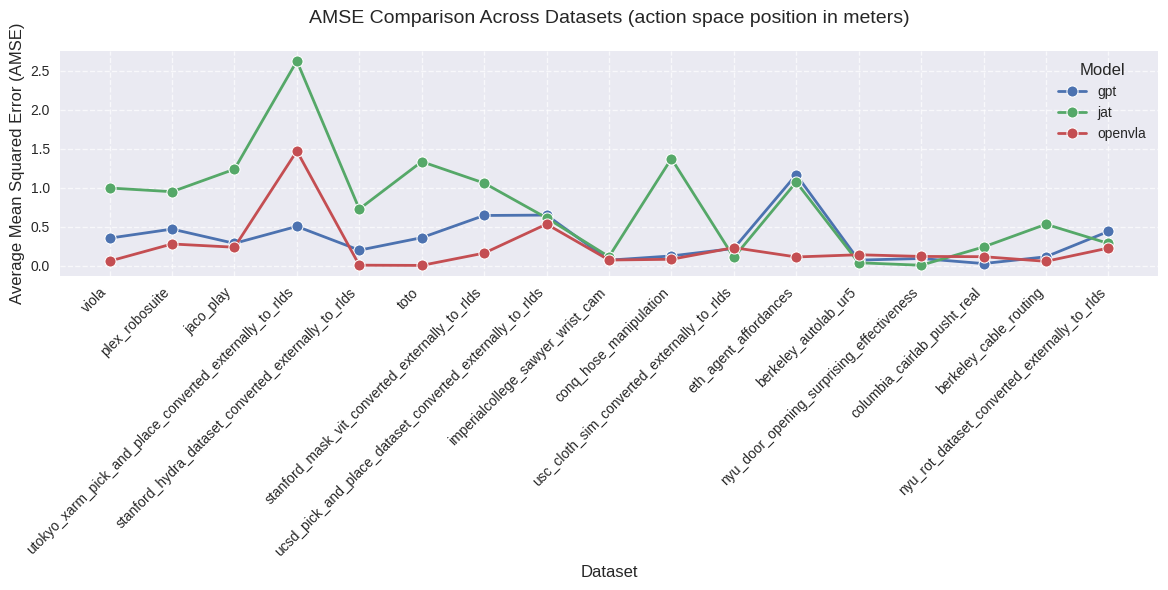

In [14]:
plt.style.use(['seaborn-v0_8', 'seaborn-v0_8-darkgrid'])

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_in_meter,
    x='Dataset',
    y='Avg Dataset AMSE',
    hue='Model',
    marker='o',
    markersize=8,
    linewidth=2
)

plt.title('AMSE Comparison Across Datasets (dataset action space position in meters)', fontsize=14, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average Mean Squared Error (AMSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

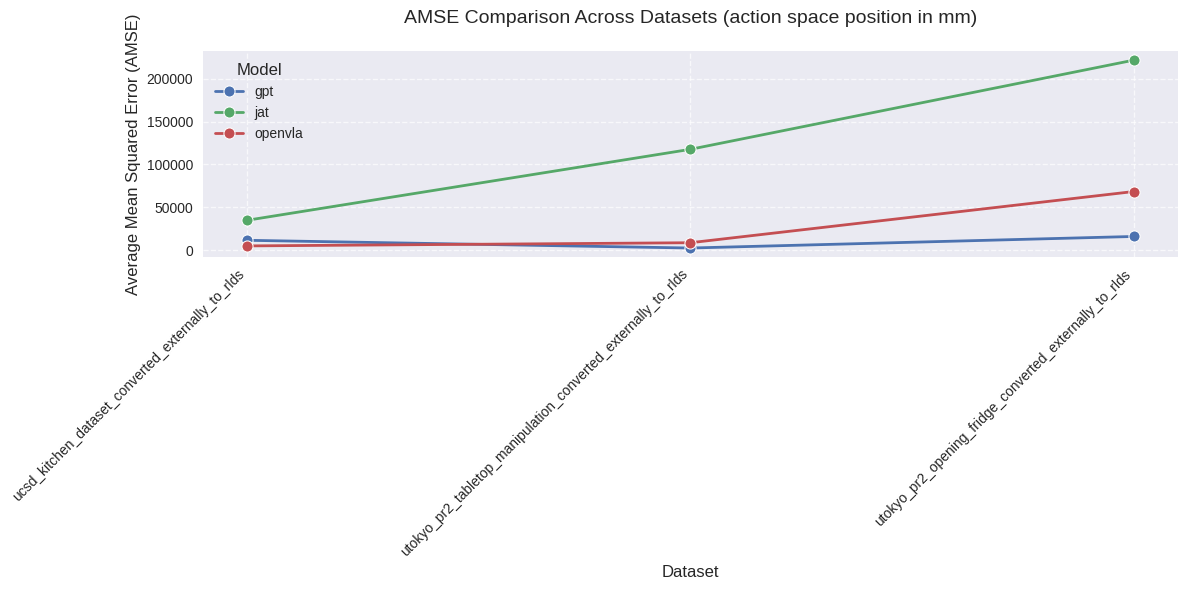

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_in_mm,
    x='Dataset',
    y='Avg Dataset AMSE',
    hue='Model',
    marker='o',
    markersize=8,
    linewidth=2
)
plt.title('AMSE Comparison Across Datasets (dataset action space position in mm)', fontsize=14, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average Mean Squared Error (AMSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()